In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  Reading the data

In [44]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [45]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

# Checking for missing values

In [46]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Droping unwanted columns

In [47]:
data.drop(columns=['_c39','insured_zip','policy_number','policy_bind_date'],inplace=True)

In [48]:
data.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                       ?   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 36 columns]

In [49]:
data['fraud_reported']=data['fraud_reported'].apply(lambda x:1 if x=='Y' else 0)

In [50]:
data.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                       ?   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              1  
1       E400      2007              1  
2        RAM      2007              0  
3      Tahoe      2014              1  
4        RSX      2009              0  

[5 rows x 36 columns]

# Plot showing target distribution

<AxesSubplot:>

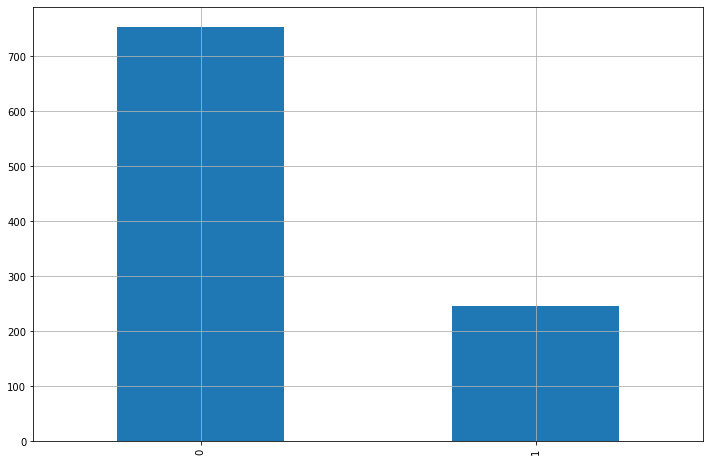

In [51]:
data['fraud_reported'].value_counts().plot(kind='bar',figsize=(12,8),grid=True)

# Plot showing fraud distribution across education and gender

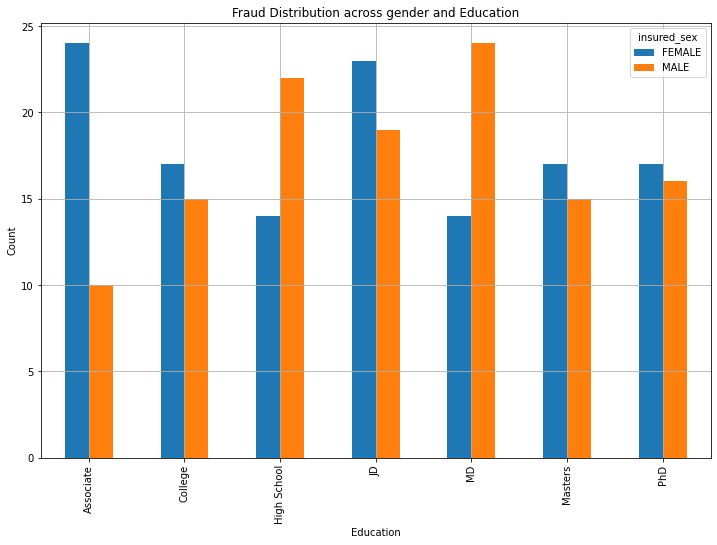

In [52]:
data.groupby(['insured_sex','insured_education_level'])['fraud_reported'].sum().unstack('insured_sex').plot(kind='bar',figsize=(12,8),grid=True)
plt.title('Fraud Distribution across gender and Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [53]:
d1=data.groupby(['insured_sex','insured_occupation'])['fraud_reported'].sum().reset_index()
d1

insured_sex insured_occupation  fraud_reported
0       FEMALE       adm-clerical               5
1       FEMALE       armed-forces               9
2       FEMALE       craft-repair              12
3       FEMALE    exec-managerial              12
4       FEMALE    farming-fishing               5
5       FEMALE  handlers-cleaners               6
6       FEMALE  machine-op-inspct               9
7       FEMALE      other-service               6
8       FEMALE    priv-house-serv               9
9       FEMALE     prof-specialty              10
10      FEMALE    protective-serv               7
11      FEMALE              sales              11
12      FEMALE       tech-support              13
13      FEMALE   transport-moving              12
14        MALE       adm-clerical               6
15        MALE       armed-forces               8
16        MALE       craft-repair              10
17        MALE    exec-managerial              16
18        MALE    farming-fishing              11
19        MALE  handlers-cleaners               5
20        MALE  machine-op-inspct              13
21        MALE      other-service               6
22        MALE    priv-house-serv               3
23        MALE     prof-specialty               8
24        MALE    protective-serv               7
25        MALE              sales              10
26        MALE       tech-support               9
27        MALE   transport-moving               9

# Fraud Distribution across gender and occupation

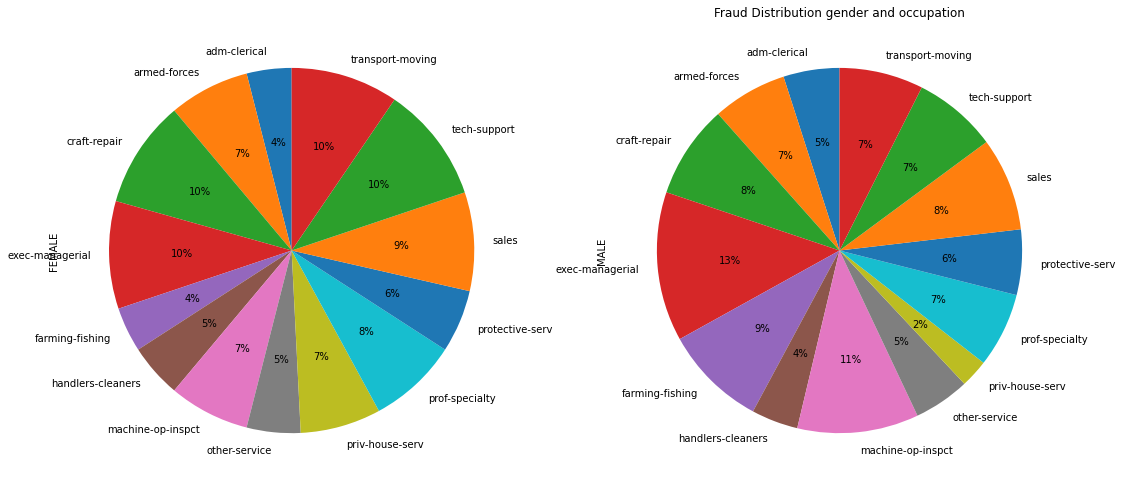

In [54]:
pd.pivot_table(d1,index='insured_occupation',columns='insured_sex',values='fraud_reported').plot(kind='pie',subplots=True,figsize=(18,12),
                                                                                                legend=False,startangle=90,autopct='%1.0f%%')
plt.title('Fraud Distribution gender and occupation')

plt.show()


# Fraud Distribution across ech year

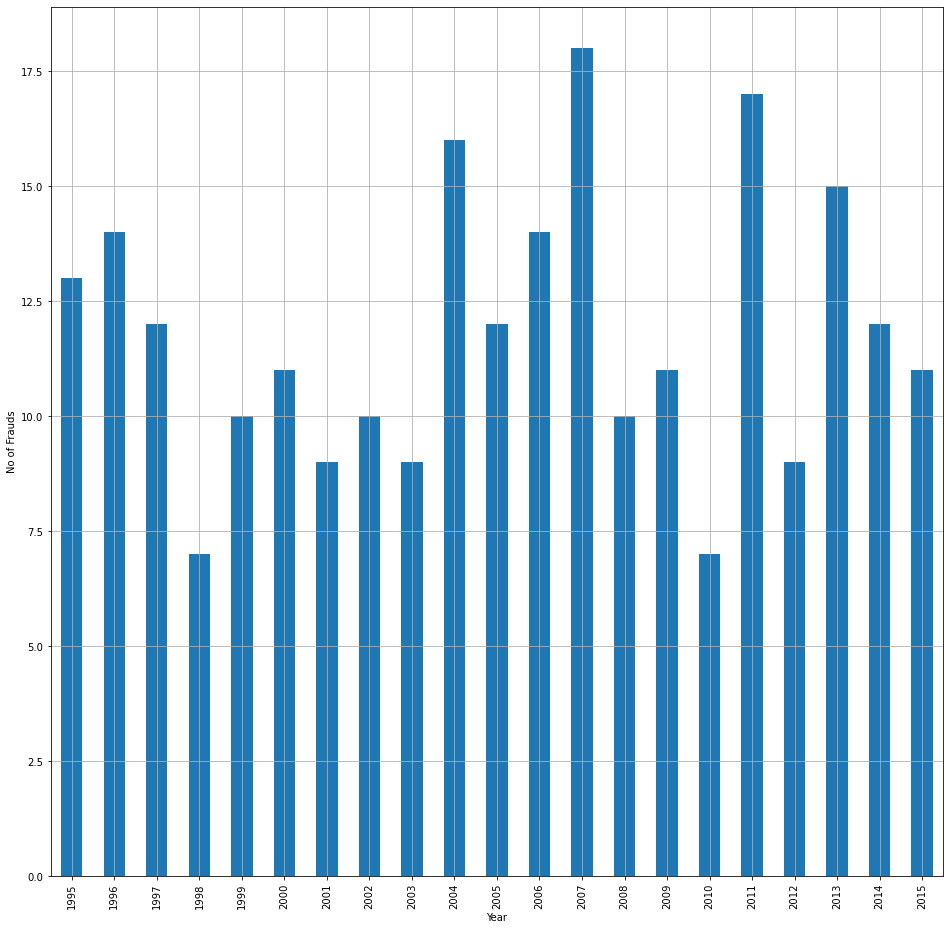

In [55]:
data.groupby('auto_year')['fraud_reported'].sum().plot(kind='bar',grid=True,figsize=(16,16))
plt.xlabel('Year')
plt.ylabel('No of Frauds')
plt.show()

# Plot showing Fraud Distribution across Auto Make

Text(0.5, 1.0, 'Fraud Distribution across Auto Make')

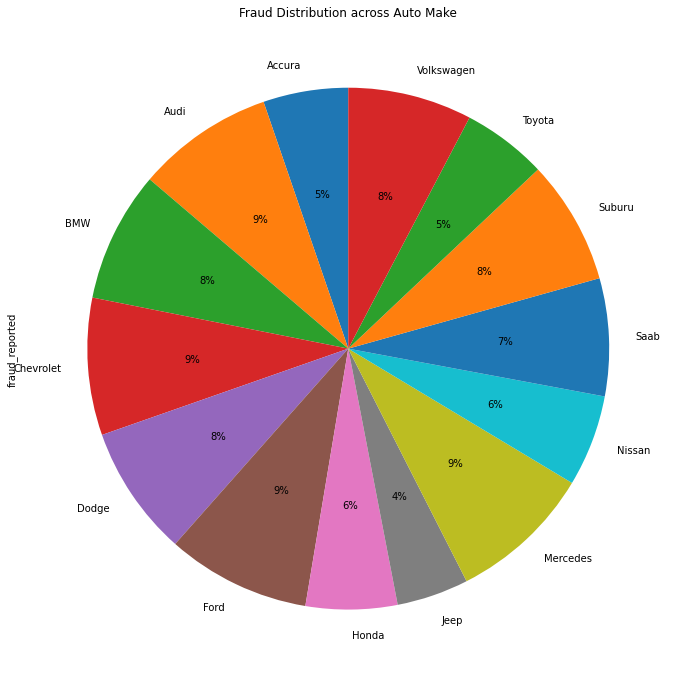

In [56]:
data.groupby('auto_make')['fraud_reported'].sum().plot(kind='pie',figsize=(12,12),autopct='%1.0f%%',legend=False,startangle=90)
plt.title('Fraud Distribution across Auto Make')

# Plot showing fraud distribution across Auto Model

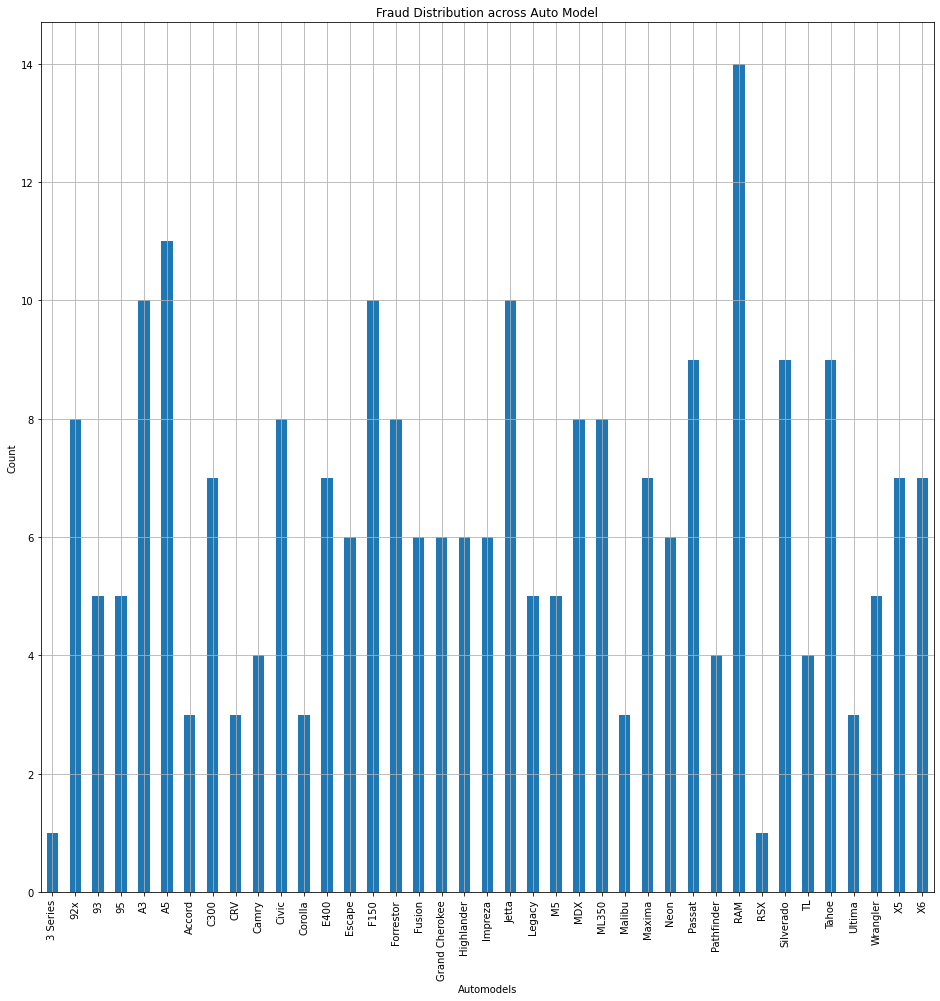

In [57]:
data.groupby('auto_model')['fraud_reported'].sum().plot(kind='bar',figsize=(16,16),grid=True)
plt.title('Fraud Distribution across Auto Model')
plt.xlabel('Automodels')
plt.ylabel('Count')
plt.show()

In [58]:
fraud_rate=data.groupby('age')['fraud_reported'].sum()/data.groupby('age')['fraud_reported'].count()*100

In [59]:
fraud_rate=fraud_rate.reset_index()

In [60]:
fraud_rate=fraud_rate.sort_values(by='fraud_reported',ascending=False)

# Plot showing fraud distribution across age

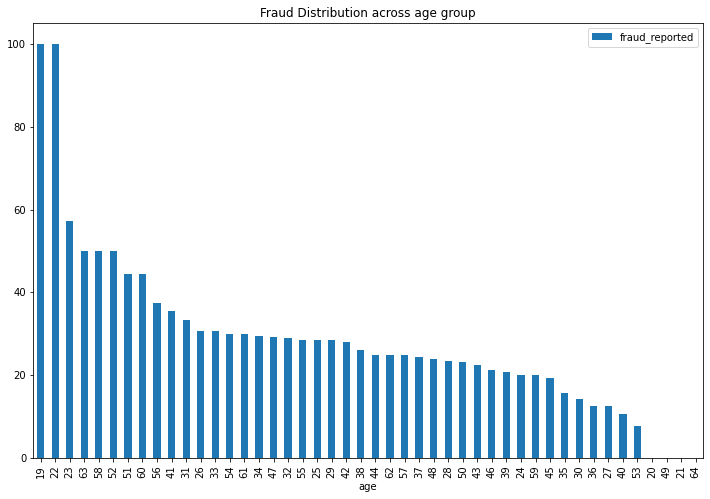

In [61]:
fraud_rate.set_index('age').plot(figsize=(12,8),kind='bar')
plt.title('Fraud Distribution across age group')
plt.show()

In [62]:
data.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                       ?   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              1  
1       E400      2007              1  
2        RAM      2007              0  
3      Tahoe      2014              1  
4        RSX      2009              0  

[5 rows x 36 columns]

In [63]:
d2=data.groupby(['insured_sex','policy_state'])['fraud_reported'].sum().reset_index()
d2

insured_sex policy_state  fraud_reported
0      FEMALE           IL              39
1      FEMALE           IN              38
2      FEMALE           OH              49
3        MALE           IL              38
4        MALE           IN              41
5        MALE           OH              42

# Plot showing Fraud Distribution across gender and state

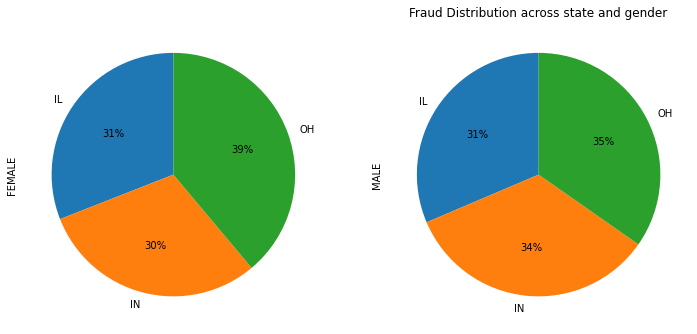

In [64]:
pd.pivot_table(d2,index='policy_state',columns='insured_sex',values='fraud_reported').plot(kind='pie',autopct='%1.0f%%',startangle=90,
                                                                                          legend=False,subplots=True,figsize=(12,12))
plt.title('Fraud Distribution across state and gender')
plt.show()

In [65]:
data.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                       ?   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              1  
1       E400      2007              1  
2        RAM      2007              0  
3      Tahoe      2014              1  
4        RSX      2009              0  

[5 rows x 36 columns]

In [66]:
data.drop(columns=['policy_csl'],inplace=True)

In [67]:
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [69]:
cat_feat=[i for i in x.columns if x[i].dtype=='O']
cont_feat=[i for i in x.columns if x[i].dtype!='O']

# MeanEncoding the categorical Variables

In [70]:
def MeanEncoding(data,col,target):
    mpp=data.groupby(col)[target].mean().to_dict()
    data[col]=data[col].map(mpp)
    return data

In [71]:
for i in cat_feat:
    data=MeanEncoding(data,i,'fraud_reported')

In [72]:
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48      0.258523               1000   
1                 228   42      0.254839               2000   
2                 134   29      0.258523               2000   
3                 256   41      0.227811               2000   
4                 228   44      0.227811               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0     0.261339   
1                1197.22         5000000     0.261339   
2                1413.14         5000000     0.234637   
3                1415.74         6000000     0.234637   
4                1583.91         6000000     0.261339   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                 0.263889            0.297297         0.195122  ...   
1                 0.263889            0.236559         0.265625  ...   
2                 0.264000            0.276316         0.291667  ...   
3                 0.264000            0.246377         0.291667  ...   
4                 0.234483            0.276316         0.291667  ...   

   witnesses  police_report_available  total_claim_amount  injury_claim  \
0          2                 0.229299               71610          6510   
1          0                 0.259475                5070           780   
2          3                 0.250729               34650          7700   
3          2                 0.250729               63400          6340   
4          1                 0.250729                6500          1300   

   property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
0           13020          52080   0.225000    0.285714       2004   
1             780           3510   0.338462    0.259259       2007   
2            3850          23100   0.250000    0.325581       2007   
3            6340          50720   0.276316    0.375000       2014   
4             650           4550   0.191176    0.083333       2009   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0  

[5 rows x 35 columns]

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [75]:
data[cont_feat]=scaler.fit_transform(data[cont_feat])

In [76]:
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

# Spliting the datset

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [78]:
from sklearn.metrics import accuracy_score,classification_report

In [79]:
x_train

months_as_customer       age  policy_state  policy_deductable  \
420            0.035166  0.224613      0.254839          -0.222383   
278           -0.833979 -0.651071      0.227811           1.412784   
218            1.078140  0.771915      0.227811          -1.039966   
363            0.687024  0.224613      0.258523          -1.039966   
850           -1.659667 -1.964597      0.254839          -0.222383   
..                  ...       ...           ...                ...   
855           -0.051749 -0.322690      0.254839          -0.222383   
871           -0.616693 -0.541611      0.254839          -1.039966   
835            1.443180  1.757060      0.254839           1.412784   
792           -0.303801  0.005692      0.258523           1.412784   
520            0.660950  0.443534      0.254839          -0.222383   

     policy_annual_premium  umbrella_limit  insured_sex  \
420              -0.498785       -0.479476     0.234637   
278              -2.302672       -0.479476     0.234637   
218               0.238455       -0.479476     0.234637   
363              -0.251577       -0.479476     0.234637   
850               1.228886       -0.479476     0.261339   
..                     ...             ...          ...   
855              -0.655682       -0.479476     0.261339   
871              -0.747141       -0.479476     0.234637   
835               0.543849        2.568963     0.261339   
792              -0.476371       -0.479476     0.261339   
520               1.241302       -0.479476     0.261339   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
420                 0.262295            0.282051         0.826087  ...   
278                 0.260870            0.246377         0.192982  ...   
218                 0.263889            0.211765         0.192982  ...   
363                 0.234483            0.276316         0.265625  ...   
850                 0.234483            0.211765         0.109091  ...   
..                       ...                 ...              ...  ...   
855                 0.225000            0.246377         0.092593  ...   
871                 0.260870            0.211765         0.160714  ...   
835                 0.260870            0.169014         0.176471  ...   
792                 0.225000            0.246377         0.192982  ...   
520                 0.260870            0.291667         0.230769  ...   

     bodily_injuries  witnesses  police_report_available  total_claim_amount  \
420         1.229693   0.461838                 0.259475            0.626719   
278        -1.210174  -0.438431                 0.229299            0.439136   
218         1.229693   1.362107                 0.259475            0.664235   
363        -1.210174   0.461838                 0.259475           -0.381303   
850         1.229693  -1.338700                 0.229299            1.597981   
..               ...        ...                      ...                 ...   
855         0.009759   1.362107                 0.229299           -0.127024   
871         1.229693  -1.338700                 0.229299           -1.840281   
835        -1.210174   0.461838                 0.259475           -1.658382   
792        -1.210174   1.362107                 0.250729           -0.248668   
520        -1.210174   0.461838                 0.259475            0.918514   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
420     -0.103191        1.339695       0.560532   0.279412    0.285714   
278     -0.324570        0.891777       0.469944   0.179487    0.129032   
218      1.095945       -0.209354       0.698797   0.225000    0.285714   
363     -1.523707       -0.269491      -0.070401   0.338462    0.400000   
850      0.245276        0.255153       2.105284   0.191176    0.083333   
..            ...             ...            ...        ...         ...   
855     -0.398363       -0.395986       0.026543   0.304348    0.270270   
871  

In [80]:
def Predction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    report=classification_report(y_test,y_pred)
    return score,report
    

# Fnal Report and accuracy

In [81]:
lg_score,lg_report=Predction(LogisticRegression(),x_train,x_test,y_train,y_test)

In [82]:
print(lg_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [83]:
lg_score

1.0